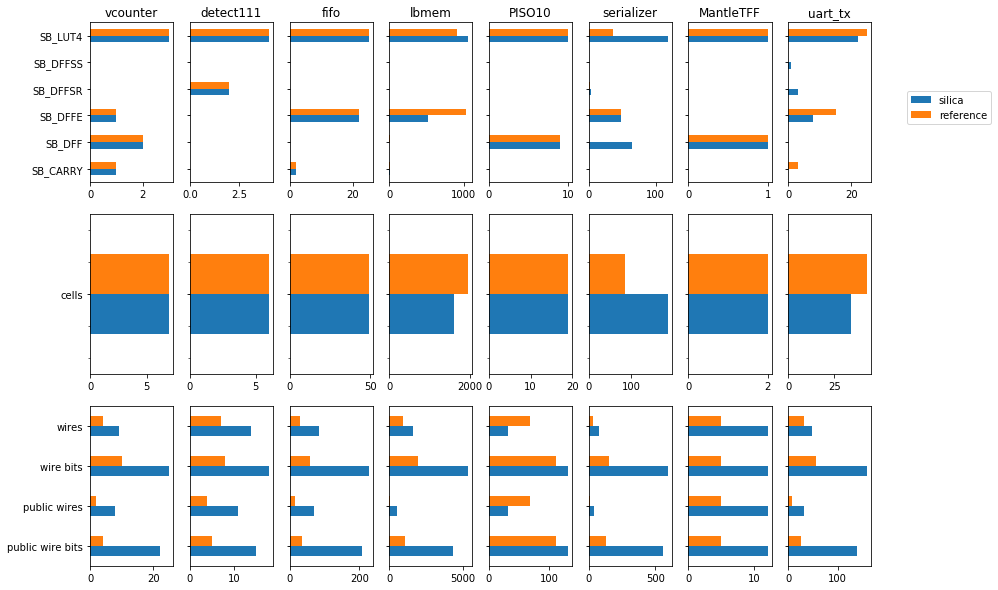

In [11]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


results = pd.read_json("results.json")
col_len = (len(results.columns) // 2)
fig, axes = plt.subplots(nrows=3, ncols=col_len, sharey='row')
fig.set_figwidth(14)
fig.set_figheight(10)


for row in range(0, 3):
    for i, columns in enumerate(zip(results.columns[::2], results.columns[1::2])):
        title = columns[1]
        curr = results[list(columns)].rename(index=str, columns={columns[0]: "silica", columns[1]: "reference"})
        curr = curr.loc[(curr != 0).all(axis=1), :]
        if row == 0:
            curr = curr.filter(like="SB_", axis=0)
        elif row == 1:
            curr = curr.filter(like="cells", axis=0)
        elif row == 2:
            curr = curr.filter(regex="(wires|wire bits|public wires|memories|memory bits|processes)", axis=0)
        if not curr.empty:
            if row > 0:
                title = False
            curr.plot.barh(ax=axes[row, i], legend=False, title=title)

plt.legend(bbox_to_anchor=(2.5, 3))      

plt.show()

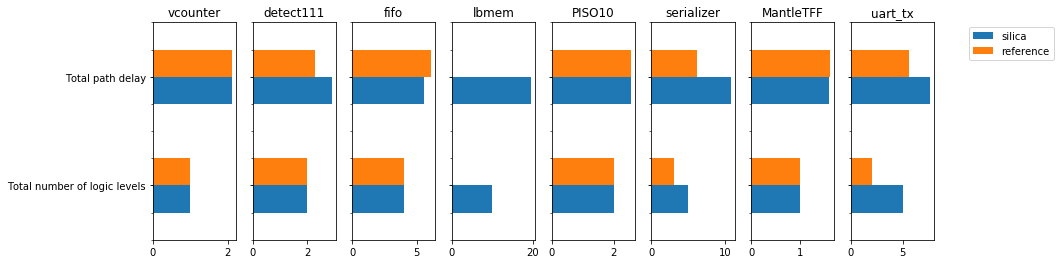

In [17]:
fig2, axes2 = plt.subplots(nrows=1, ncols=col_len, sharey='row')
fig2.set_figwidth(14)


for i, columns in enumerate(zip(results.columns[::2], results.columns[1::2])):
    title = columns[1]
    curr = results[list(columns)].rename(index=str, columns={columns[0]: "silica", columns[1]: "reference"})
    curr = curr.loc[(curr != 0).all(axis=1), :]
    curr = curr.filter(regex="(Total number of logic levels|Total path delay)", axis=0)
    curr.plot.barh(ax=axes2[i], legend=False, title=title)
plt.legend(bbox_to_anchor=(2.5, 1))      
            
plt.show()